Peneliti : **Ismatullah**

Sumber: **BPS, Survei Sosial Ekonomi Nasional (Susenas)**

Catatan: - Pembagi adalah total penduduk laki-laki/perempuan usia 5 tahun ke atas

https://www.bps.go.id/id/query-builder

## **Latar Belakang**

Akses internet merupakan salah satu indikator penting dalam mengukur pembangunan manusia dan kesiapan transformasi digital di suatu wilayah. Analisis ini bertujuan untuk mengevaluasi distribusi dan ketimpangan akses internet penduduk di Indonesia berdasarkan provinsi, jenis kelamin, dan periode waktu 2014–2023. Dengan pendekatan analitis dan visualisasi data, portofolio ini diharapkan mampu memberikan insight yang informatif bagi pengambilan kebijakan maupun kajian akademik.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
df = pd.read_excel("C:/Users/ismatullah/Documents/Data_Akses_Internet.xlsx")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 780 entries, 0 to 779
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PROVINSI       780 non-null    object 
 1   PERSENTASE     698 non-null    float64
 2   JENIS_KELAMIN  780 non-null    object 
 3   TAHUN          780 non-null    int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 24.5+ KB


Berdasarkan informasi di atas dapat disimpulkan bahwa **masih terdapat beberapa nilai null pada variabel PERSENTASE**. Mari kita lihat provinsi mana saja yang masih terdapat nilai null dengan **menggunakan pivot table**.

In [4]:
df[df['PERSENTASE'].isna()].pivot_table(index='PROVINSI',columns='TAHUN',values='JENIS_KELAMIN',aggfunc='count',fill_value=0)

TAHUN,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
PROVINSI,,,,,,,,,,
KALIMANTAN UTARA,2,0,0,0,0,0,0,0,0,0
PAPUA BARAT DAYA,2,2,2,2,2,2,2,2,2,2
PAPUA PEGUNUNGAN,2,2,2,2,2,2,2,2,2,2
PAPUA SELATAN,2,2,2,2,2,2,2,2,2,2
PAPUA TENGAH,2,2,2,2,2,2,2,2,2,2


Berdasarkan hasil pivot table di atas, dapat diketahui bahwa **pada tahun 2014 data untuk provinsi Kalimantan Utara tidak tersedia**, sementara untuk provinsi Papua Barat Daya, Papua Pegunungan, Papua Selatan, dan Papua Tengah, data tidak tersedia dari tahun 2014 hingga 2023. Perlu dicatat bahwa **provinsi Papua Barat Daya, Papua Pegunungan, Papua Selatan, dan Papua Tengah baru disahkan pada tahun 2022**, sehingga data untuk provinsi-provinsi tersebut tidak tersedia dalam periode sebelumnya. Hal ini kemungkinan disebabkan oleh ketidaktersediaan data akibat kurangnya laporan yang disampaikan oleh provinsi-provinsi tersebut, atau kebijakan internal BPS yang memengaruhi pengumpulan dan publikasi data.

## **Provinsi mana saja yang memiliki Akses Internet Tertinggi?**

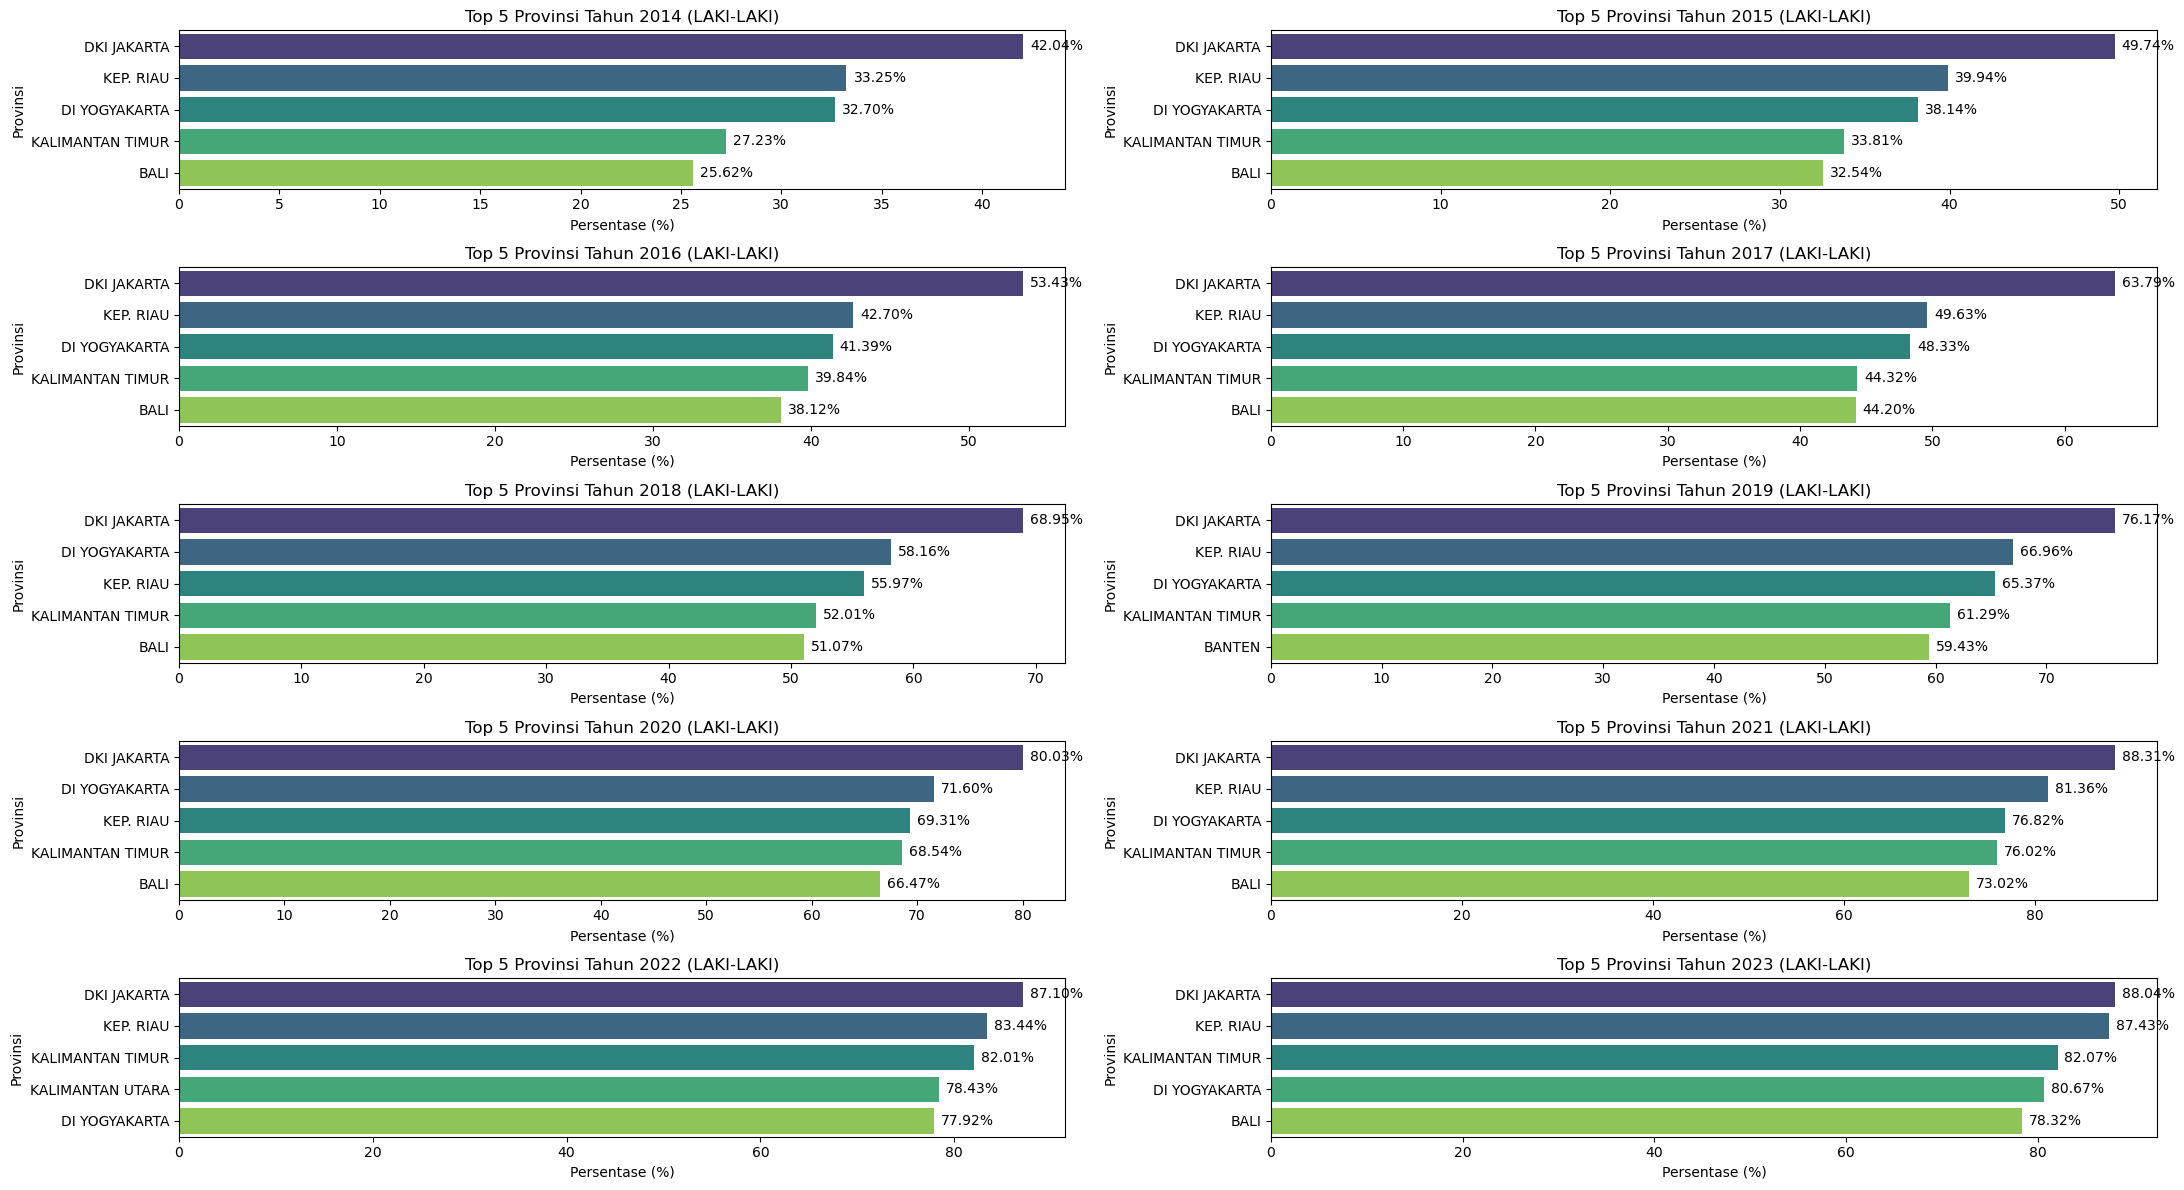

In [5]:
# Membuat figure dan axis dengan subplots
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(22, 12))

# Mengatur layout agar grafik tidak terpotong
axes = axes.flatten()  # Mengubah menjadi 1D array untuk mempermudah indexing

# Iterasi untuk setiap tahun (misalnya dari 2014 hingga 2023)
for idx, i in enumerate(df['TAHUN'].unique()):
    # Filter data untuk provinsi selain 'INDONESIA' dan jenis kelamin 'LAKI-LAKI'
    data = df[(df['PROVINSI'] != 'INDONESIA') & (df['TAHUN'] == i) & (df['JENIS_KELAMIN'] == 'LAKI-LAKI')]

    # Mengurutkan berdasarkan persentase terbesar
    data = data.sort_values(by='PERSENTASE', ascending=False)

    # Mengambil 5 provinsi teratas (menggunakan .head(5))
    data_top5 = data.head(5)

    # Membuat grafik pada subplot yang sesuai
    sns.barplot(x='PERSENTASE', y='PROVINSI', palette='viridis', data=data_top5, ax=axes[idx])

    # Menambahkan judul dan label untuk setiap grafik
    axes[idx].set_title(f'Top 5 Provinsi Tahun {i} (LAKI-LAKI)')
    axes[idx].set_xlabel('Persentase (%)')
    axes[idx].set_ylabel('Provinsi')

# Menambahkan label persentase di atas setiap batang
    for p in axes[idx].patches:
        # Menambahkan teks persentase di ujung kanan batang
        axes[idx].annotate(f'{p.get_width():.2f}%',  # Format angka dengan dua desimal
                           (p.get_width(), p.get_y() + p.get_height() / 2),  # Posisi x dan y
                           ha='left',  # Horizontal alignment (kiri)
                           va='center',  # Vertical alignment (tengah)
                           fontsize=10,  # Ukuran font
                           color='black',  # Warna teks
                           xytext=(5, 0),  # Jarak teks dari batang
                           textcoords='offset points')  # Menggunakan offset points untuk posisi teks

# Menyesuaikan layout agar tidak terpotong
plt.tight_layout()

# Menampilkan grafik
plt.show()

Visualisasi bar chart dilakukan untuk mengidentifikasi lima provinsi dengan persentase akses internet tertinggi pada penduduk laki-laki di setiap tahun (2014–2023), dengan mengecualikan agregat nasional (Indonesia).

Temuan Utama:

- **DKI Jakarta secara konsisten menempati posisi teratas** sepanjang periode analisis, dengan tren peningkatan yang signifikan hingga mencapai 88,0% pada tahun 2023.

- Provinsi lain yang sering masuk **lima besar adalah Kepulauan Riau, DI Yogyakarta, Kalimantan Timur, dan Bali**.

- Terdapat fluktuasi di beberapa provinsi, misalnya penurunan Bali pada tahun 2022, yang dapat mengindikasikan dampak faktor ekonomi atau sosial pascapandemi.

- Banten mulai muncul dalam lima besar sejak 2019, menunjukkan adanya pergeseran dan peningkatan penetrasi internet di wilayah penyangga ibu kota.

Analisis ini menegaskan bahwa **provinsi dengan tingkat urbanisasi dan infrastruktur digital yang baik cenderung memiliki akses internet yang lebih tinggi**.

## **Provinsi mana saja yang memiliki Akses Internet Terendah?**

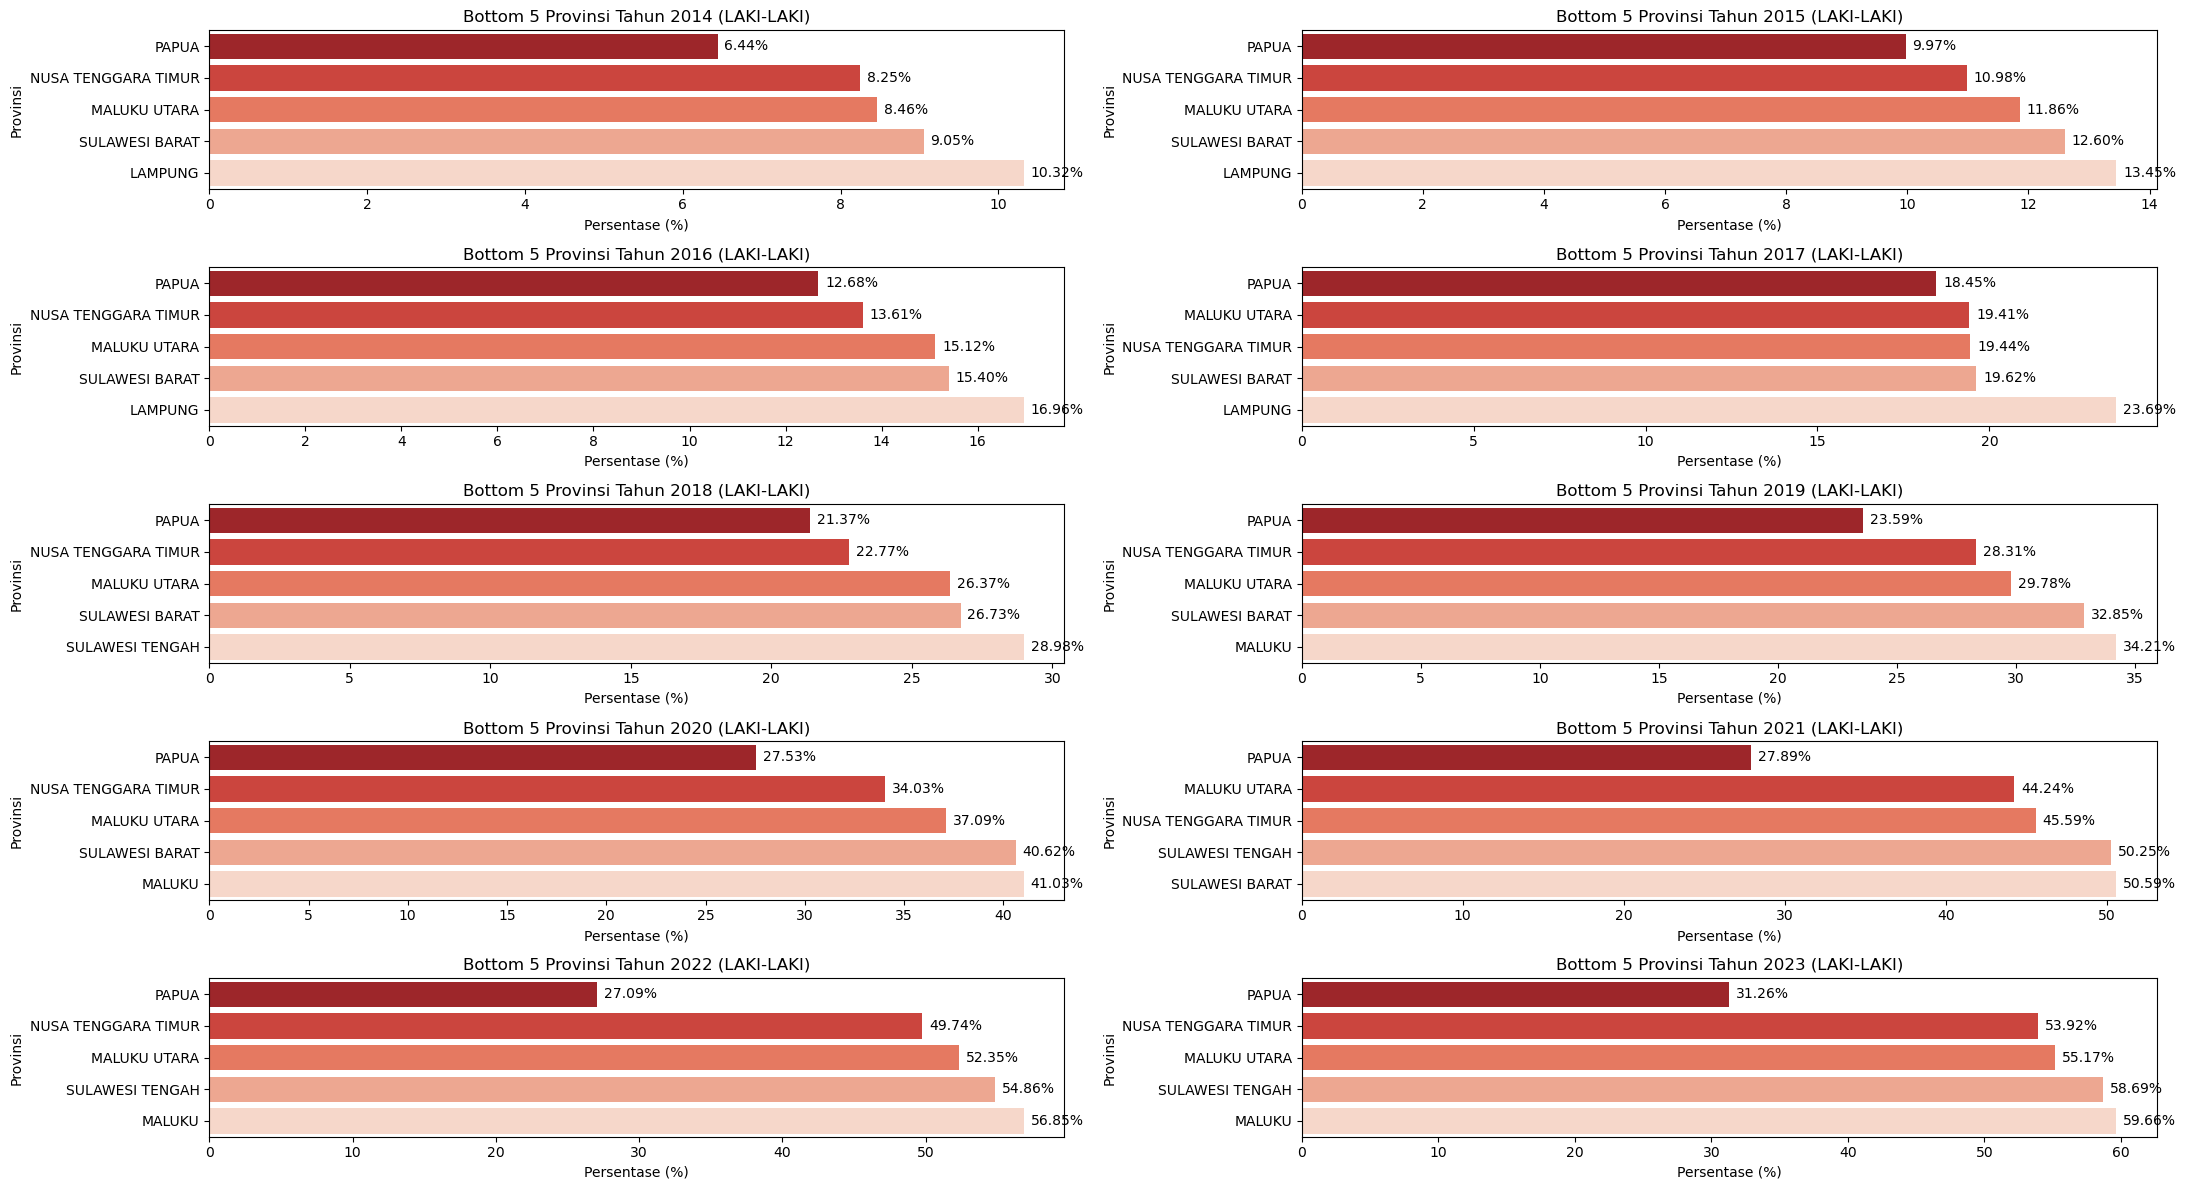

In [23]:
# Membuat figure dan axis dengan subplots
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(22, 12))

# Mengatur layout agar grafik tidak terpotong
axes = axes.flatten()  # Mengubah menjadi 1D array untuk mempermudah indexing

# Iterasi untuk setiap tahun (misalnya dari 2014 hingga 2023)
for idx, i in enumerate(df['TAHUN'].unique()):
    # Filter data untuk provinsi selain 'INDONESIA' dan jenis kelamin 'LAKI-LAKI'
    data = df[(df['PROVINSI'] != 'INDONESIA') & (df['TAHUN'] == i) & (df['JENIS_KELAMIN'] == 'LAKI-LAKI')]

    # Mengurutkan berdasarkan persentase terbesar
    data = data.sort_values(by='PERSENTASE', ascending=True)

    # Mengambil 5 provinsi teratas (menggunakan .head(5))
    data_top5 = data.head(5)

    # Membuat grafik pada subplot yang sesuai
    sns.barplot(x='PERSENTASE', y='PROVINSI', palette= sns.color_palette("Reds_r", 5), data=data_top5, ax=axes[idx])

    # Menambahkan judul dan label untuk setiap grafik
    axes[idx].set_title(f'Bottom 5 Provinsi Tahun {i} (LAKI-LAKI)')
    axes[idx].set_xlabel('Persentase (%)')
    axes[idx].set_ylabel('Provinsi')

# Menambahkan label persentase di atas setiap batang
    for p in axes[idx].patches:
        # Menambahkan teks persentase di ujung kanan batang
        axes[idx].annotate(f'{p.get_width():.2f}%',  # Format angka dengan dua desimal
                           (p.get_width(), p.get_y() + p.get_height() / 2),  # Posisi x dan y
                           ha='left',  # Horizontal alignment (kiri)
                           va='center',  # Vertical alignment (tengah)
                           fontsize=10,  # Ukuran font
                           color='black',  # Warna teks
                           xytext=(5, 0),  # Jarak teks dari batang
                           textcoords='offset points')  # Menggunakan offset points untuk posisi teks

# Menyesuaikan layout agar tidak terpotong
plt.tight_layout()

# Menampilkan grafik
plt.show()

Grafik menunjukkan bahwa **provinsi-provinsi dengan akses internet terendah pada penduduk laki-laki didominasi oleh wilayah Indonesia bagian timur**, khususnya **Papua, Nusa Tenggara Timur, dan Maluku**, yang secara konsisten muncul dalam kelompok lima terbawah sepanjang periode 2014–2023. Meskipun terjadi peningkatan persentase akses internet dari tahun ke tahun di seluruh provinsi, kesenjangan antarwilayah tetap terlihat jelas, di mana provinsi-provinsi tersebut masih tertinggal dibandingkan wilayah barat Indonesia. Kondisi ini mengindikasikan bahwa peningkatan akses internet secara nasional **belum sepenuhnya diiringi dengan pemerataan infrastruktur dan aksesibilitas**, terutama di daerah dengan tantangan geografis dan keterbatasan pembangunan. Oleh karena itu, temuan ini menegaskan perlunya **intervensi kebijakan yang lebih terfokus pada wilayah tertinggal** agar pertumbuhan akses internet dapat berlangsung lebih merata.

## **Bagaimana perkembangan akses internet dari waktu ke waktu?**

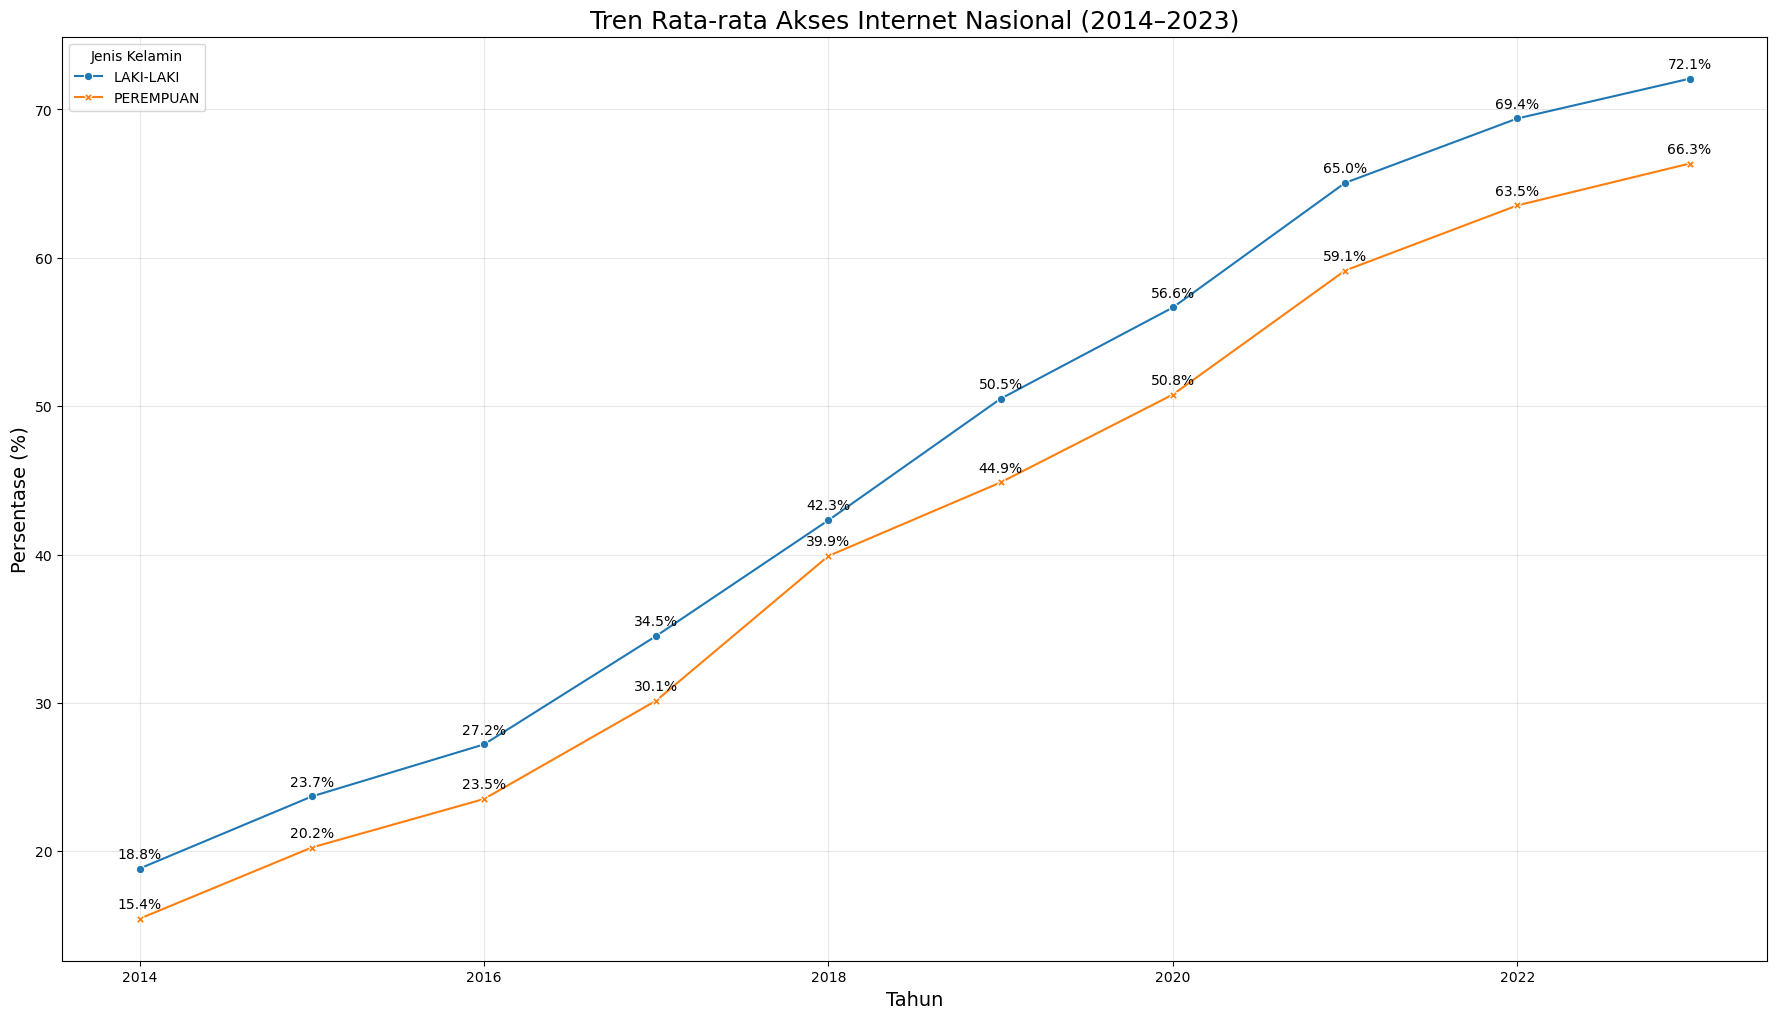

In [12]:
plt.figure(figsize=(22,12))

ax = sns.lineplot(
    data=df[df['PROVINSI'] == 'INDONESIA'],
    x='TAHUN',
    y='PERSENTASE',
    hue='JENIS_KELAMIN',
    style='JENIS_KELAMIN',
    markers=True,
    dashes=False
)

# Menambahkan label angka
for line in ax.lines:
    for x, y in zip(line.get_xdata(), line.get_ydata()):
        ax.text(
            x, y + 0.5,
            f'{y:.1f}%',
            ha='center',
            va='bottom',
            fontsize=10
        )

plt.title('Tren Rata-rata Akses Internet Nasional (2014–2023)', fontsize=18)
plt.xlabel('Tahun', fontsize=14)
plt.ylabel('Persentase (%)', fontsize=14)
plt.legend(title='Jenis Kelamin')
plt.grid(alpha=0.3)

plt.show()


Grafik ini menunjukkan peningkatan rata-rata akses internet nasional pada laki-laki dan perempuan sepanjang 2014–2023. **Laki-laki konsisten memiliki tingkat akses lebih tinggi**, meskipun tren peningkatan terjadi pada kedua gender. Hal ini mengindikasikan adanya kemajuan digital yang merata, namun kesenjangan gender masih perlu mendapat perhatian.

Mengingat adanya perbedaan tingkat akses internet antara laki-laki dan perempuan, **analisis berikutnya bertujuan untuk melihat besarnya selisih akses internet (gender gap) di tiap provinsi**.

## **Selisish Akses Internet Berdasarkan Jenis Kelamin**

In [13]:
# Filter data (tanpa agregat nasional)
df_gap = df[df['PROVINSI'] != 'INDONESIA']

# Pivot agar laki-laki & perempuan sejajar
pivot_gap = df_gap.pivot_table(
    index='PROVINSI',
    columns='JENIS_KELAMIN',
    values='PERSENTASE',
    aggfunc='mean'
).reset_index()

# Hitung gap gender
pivot_gap['GAP_GENDER'] = pivot_gap['LAKI-LAKI'] - pivot_gap['PEREMPUAN']

# Urutkan dari gap terbesar
pivot_gap = pivot_gap.sort_values('GAP_GENDER', ascending=False)


In [14]:
pivot_gap

JENIS_KELAMIN,PROVINSI,LAKI-LAKI,PEREMPUAN,GAP_GENDER
1,BALI,54.398000,45.110000,9.288
10,JAWA TIMUR,45.405000,38.830000,6.575
2,BANTEN,51.861000,45.473000,6.388
12,KALIMANTAN SELATAN,48.306000,42.414000,5.892
9,JAWA TENGAH,46.051000,40.290000,5.761
5,DKI JAKARTA,69.760000,64.021000,5.739
21,NUSA TENGGARA BARAT,38.090000,32.482000,5.608
4,DI YOGYAKARTA,59.110000,53.511000,5.599
0,ACEH,36.388000,31.046000,5.342
8,JAWA BARAT,50.488000,45.343000,5.145


## **📊 Gap Gender Chart**

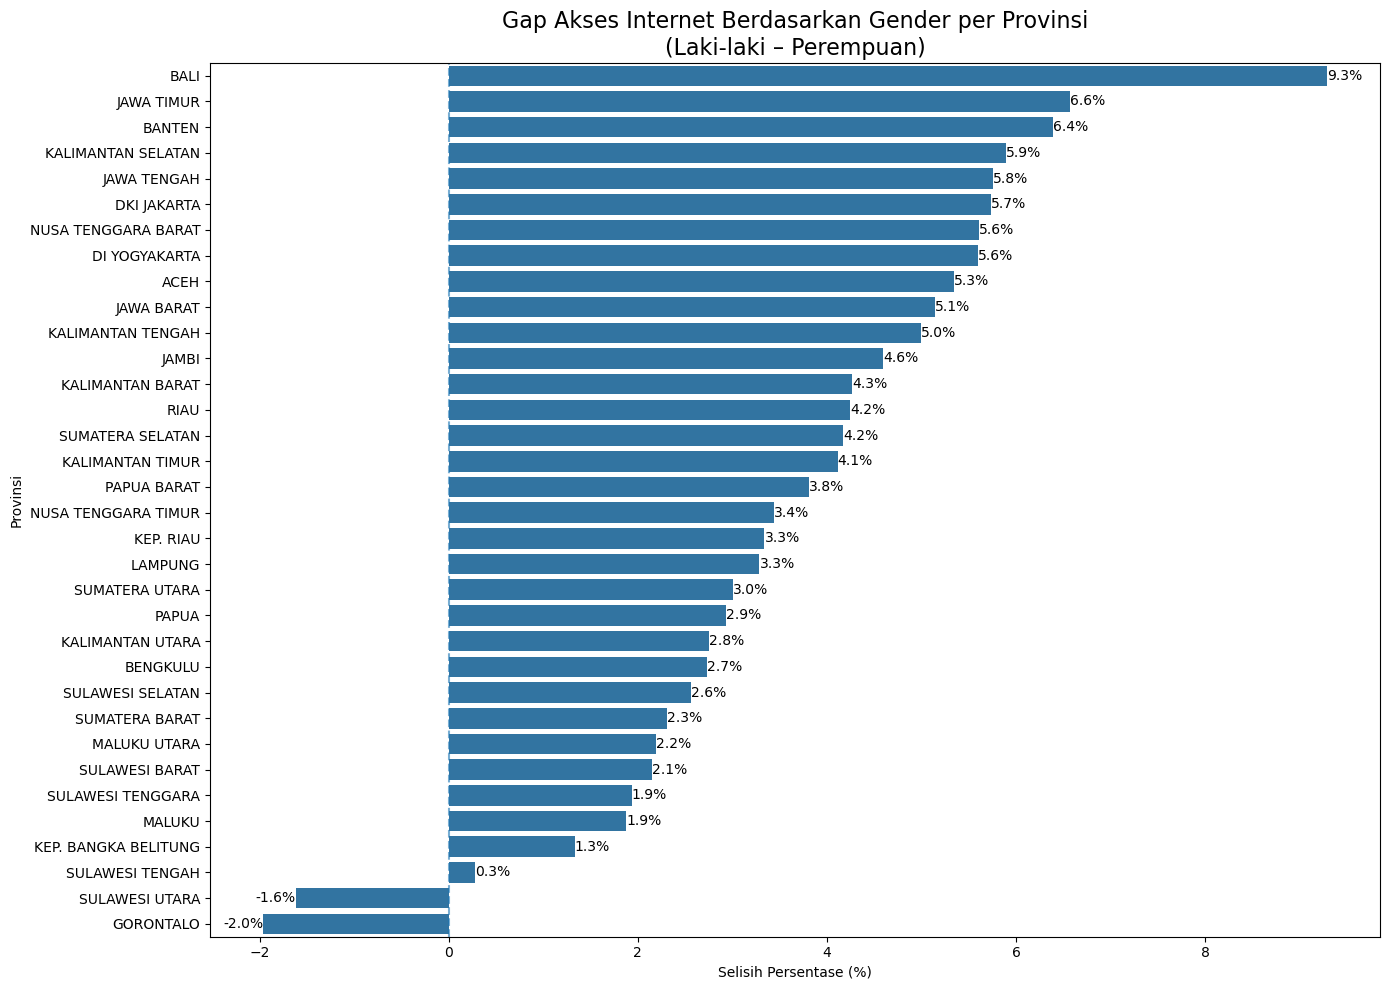

In [15]:
plt.figure(figsize=(14,10))

sns.barplot(
    data=pivot_gap,
    x='GAP_GENDER',
    y='PROVINSI'
)

plt.axvline(0, linestyle='--', alpha=0.6)
plt.title('Gap Akses Internet Berdasarkan Gender per Provinsi\n(Laki-laki – Perempuan)', fontsize=16)
plt.xlabel('Selisih Persentase (%)')
plt.ylabel('Provinsi')

# Label nilai gap
for index, value in enumerate(pivot_gap['GAP_GENDER']):
    plt.text(
        value,
        index,
        f'{value:.1f}%',
        va='center',
        ha='left' if value >= 0 else 'right'
    )

plt.tight_layout()
plt.show()


Grafik menunjukkan bahwa **sebagian besar provinsi di Indonesia masih memiliki gap akses internet yang didominasi laki-laki**, dengan besaran kesenjangan yang bervariasi antarwilayah. Provinsi seperti **Bali, Jawa Timur, dan Banten** memiliki gap gender relatif besar, yang mengindikasikan bahwa tingginya penetrasi internet belum sepenuhnya diikuti oleh pemerataan akses bagi perempuan. Di sisi lain, beberapa provinsi menunjukkan gap yang kecil, bahkan **Sulawesi Utara dan Gorontalo memiliki gap negatif**, di mana perempuan justru memiliki akses internet lebih tinggi dibandingkan laki-laki. Temuan ini menegaskan bahwa meskipun akses internet nasional terus meningkat, **kesenjangan gender masih menjadi tantangan**, sehingga diperlukan kebijakan yang lebih inklusif dan sensitif terhadap kondisi sosial di masing-masing daerah.

## **Heatmap Persentase Akses Internet per Provinsi dan Jenis Kelamin**

Tujuan Heatmap Persentase Akses Internet per Provinsi dan Jenis Kelamin adalah untuk memberikan **gambaran komparatif yang cepat dan menyeluruh** mengenai tingkat akses internet antarprovinsi sekaligus perbedaan berdasarkan gender, sehingga pola, ketimpangan, dan area prioritas dapat dengan mudah diidentifikasi.

In [6]:
# Mengelompokkan data berdasarkan provinsi dan jenis kelamin, lalu menghitung rata-rata akses internet
dr = df[(df['PROVINSI'] != 'INDONESIA')]
grouped_data = dr.groupby(['PROVINSI', 'JENIS_KELAMIN']).agg({'PERSENTASE': 'mean'}).reset_index()

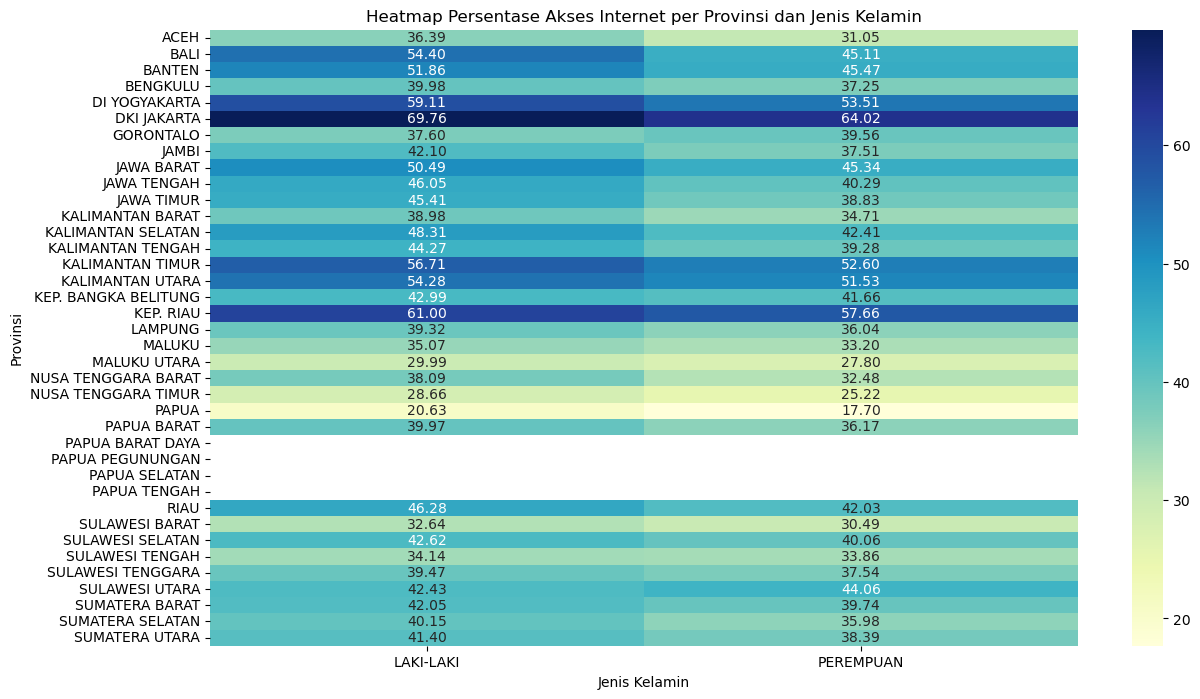

In [7]:
# Pivot data untuk heatmap
heatmap_data = grouped_data.pivot(index='PROVINSI', columns='JENIS_KELAMIN', values='PERSENTASE')

# Visualisasi heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(heatmap_data, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title('Heatmap Persentase Akses Internet per Provinsi dan Jenis Kelamin')
plt.xlabel('Jenis Kelamin')
plt.ylabel('Provinsi')
plt.show()

Untuk melihat gambaran menyeluruh, data dikelompokkan berdasarkan provinsi dan jenis kelamin, kemudian dihitung nilai rata-rata persentase akses internet selama periode pengamatan. Hasilnya divisualisasikan dalam bentuk heatmap.

**Insight Utama dari Heatmap:**

- **DKI Jakarta Dominan**: Memiliki rata-rata akses internet tertinggi baik untuk laki-laki (69,76%) maupun perempuan (64,02%).

- **Kesenjangan Gender**: Secara umum, laki-laki memiliki akses internet lebih tinggi dibandingkan perempuan di hampir semua provinsi, meskipun selisihnya relatif kecil di provinsi maju seperti DKI Jakarta dan DI Yogyakarta.

- **Wilayah dengan Akses Rendah**: Provinsi di kawasan timur Indonesia seperti Papua Barat dan Nusa Tenggara Timur menunjukkan tingkat akses internet yang jauh lebih rendah dibandingkan wilayah barat Indonesia.

- **Ketimpangan Regional**: Beberapa provinsi di Sulawesi dan Papua masih menghadapi keterbatasan akses, terutama pada penduduk perempuan.

## **Kesimpulan Akhir**

Berdasarkan analisis akses internet penduduk Indonesia periode 2014–2023, dapat disimpulkan bahwa **akses internet secara nasional menunjukkan tren peningkatan yang konsisten**, baik pada penduduk laki-laki maupun perempuan. Namun, peningkatan ini **belum sepenuhnya merata antarprovinsi dan antar gender**.

Provinsi dengan tingkat urbanisasi dan infrastruktur digital yang baik, seperti **DKI Jakarta, Kepulauan Riau, dan DI Yogyakarta**, secara konsisten memiliki tingkat akses internet tertinggi. Sebaliknya, **provinsi di wilayah Indonesia bagian timur**, khususnya **Papua, Nusa Tenggara Timur, dan Maluku**, masih mendominasi kelompok dengan akses internet terendah meskipun mengalami peningkatan dari waktu ke waktu. Hal ini menunjukkan **adanya ketimpangan regional yang masih persisten**.

Dari sisi gender, hasil analisis menunjukkan bahwa **laki-laki secara umum memiliki tingkat akses internet lebih tinggi dibandingkan perempuan** di hampir seluruh provinsi. Meskipun selisihnya relatif kecil di beberapa provinsi maju, **kesenjangan gender masih terlihat jelas di sejumlah wilayah**. Temuan menarik muncul di **Sulawesi Utara dan Gorontalo**, di mana perempuan justru memiliki tingkat akses internet lebih tinggi dibandingkan laki-laki, menandakan bahwa pola kesenjangan gender **tidak bersifat seragam di seluruh Indonesia**.

Secara keseluruhan, hasil analisis menegaskan bahwa tantangan utama akses internet di Indonesia saat ini bukan hanya peningkatan penetrasi, tetapi juga **pemerataan akses secara wilayah dan inklusivitas gender**.

## **Rekomendasi**

Berdasarkan temuan analisis, berikut beberapa rekomendasi yang dapat dipertimbangkan:

- **Percepatan Pembangunan Infrastruktur Digital**

Memprioritaskan pembangunan jaringan internet di wilayah tertinggal, khususnya Indonesia bagian timur, dengan pendekatan yang menyesuaikan kondisi geografis dan keterbatasan infrastruktur.

- **Penguatan Literasi Digital Masyarakat**

Meningkatkan program literasi digital, khususnya di daerah dengan akses rendah, agar peningkatan infrastruktur diikuti oleh pemanfaatan internet yang optimal.

- **Pengembangan Analisis Lanjutan**

Analisis selanjutnya dapat mengintegrasikan variabel tambahan seperti tingkat pendidikan, pendapatan, dan urbanisasi untuk memahami faktor-faktor yang memengaruhi akses internet secara lebih komprehensif.